I will be using custom generated synthetic dataset , and will use CRNN using CTC loss for text recognition .

I will clone my existing repostries from github to make this task easier as, I have already worked on this project

In [ ]:
g_drive_path = '/content/gdrive'
from google.colab import drive
drive.mount(g_drive_path)

Mounted at /content/gdrive


In [ ]:
!git clone https://github.com/sanyam83/text_renderer.git

Cloning into 'text_renderer'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 790 (delta 77), reused 0 (delta 0), pack-reused 653
Receiving objects: 100% (790/790), 11.64 MiB | 29.87 MiB/s, done.
Resolving deltas: 100% (389/389), done.


In [ ]:
%cd /content/text_renderer
!python setup.py develop

/content/text_renderer
running develop
running egg_info
creating text_renderer.egg-info
writing text_renderer.egg-info/PKG-INFO
writing dependency_links to text_renderer.egg-info/dependency_links.txt
writing top-level names to text_renderer.egg-info/top_level.txt
writing manifest file 'text_renderer.egg-info/SOURCES.txt'
writing manifest file 'text_renderer.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.6/dist-packages/text-renderer.egg-link (link to .)
Adding text-renderer 0.0.1 to easy-install.pth file

Installed /content/text_renderer
Processing dependencies for text-renderer==0.0.1
Finished processing dependencies for text-renderer==0.0.1


In [ ]:
!pip install -r docker/requirements.txt

     |████████████████████████████████| 25.4MB 119kB/s 
     |████████████████████████████████| 808kB 48.3MB/s 
     |████████████████████████████████| 870kB 49.2MB/s 
     |████████████████████████████████| 2.1MB 48.3MB/s 
     |████████████████████████████████| 81kB 11.9MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 2.9MB 47.0MB/s 
     |████████████████████████████████| 10.8MB 48.1MB/s 
     |████████████████████████████████| 92kB 14.3MB/s 
     |████████████████████████████████| 122kB 57.3MB/s 
     |████████████████████████████████| 102kB 15.4MB/s 
     |████████████████████████████████| 92kB 12.6MB/s 
     |████████████████████████████████| 102kB 14.4MB/s 
  Created wheel for lmdb: filename=lmdb-0.98-cp36-cp36m-linux_x86_64.whl size=218604 sha256=4a99091eadbdeb00e73037047d425ee3b076aab38e2878712a404daead4fc3e1
  Stored in directory: /root/.cache/pip/wheels/a1/97/8c/7721e4b6b0ac723c6cc45ecca60599a80f75e2367330647390
  Created wh

In [ ]:
!python main.py --help

usage: main.py [-h] --config CONFIG [--dataset {lmdb,img}]
               [--num_processes NUM_PROCESSES] [--log_period LOG_PERIOD]

optional arguments:
  -h, --help            show this help message and exit
  --config CONFIG       python file path
  --dataset {lmdb,img}
  --num_processes NUM_PROCESSES
  --log_period LOG_PERIOD


In [ ]:
!python main.py \
    --config example_data/example.py \
    --dataset img \
    --num_processes 1 \
    --log_period 10

2020-10-21 07:04:44.783 | INFO     | text_renderer.corpus.char_corpus:__init__:58 - load: /content/text_renderer/example_data/text/chn_text.txt
2020-10-21 07:04:44.783 | INFO     | text_renderer.corpus.char_corpus:__init__:58 - load: /content/text_renderer/example_data/text/eng_text.txt
2020-10-21 07:04:44.783 | INFO     | text_renderer.utils.utils:load_chars_file:162 - Find space in line 0 when load /content/text_renderer/example_data/char/chn.txt
2020-10-21 07:04:44.784 | INFO     | text_renderer.utils.utils:load_chars_file:172 - load 37 chars from: /content/text_renderer/example_data/char/chn.txt
2020-10-21 07:04:44.784 | INFO     | text_renderer.corpus.corpus:filter_by_chars:122 - filtering text by chars...
2020-10-21 07:04:44.784 | INFO     | text_renderer.corpus.corpus:filter_by_chars:151 - Filter 0.12%(2) chars in input text。Unique chars(1): {'\n'}
2020-10-21 07:04:44.981 | INFO     | text_renderer.utils.utils:load_chars_file:162 - Find space in line 0 when load /content/text_re

In [ ]:
!zip -r "/content/syn.zip" "/content/text_renderer/example_data/output"

	zip warning: name not matched: /content/text_renderer/example_data/output

zip error: Nothing to do! (try: zip -r /content/syn.zip . -i /content/text_renderer/example_data/output)


In [ ]:
from google.colab import files
files.download("/content/syn.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!unzip "/content/gdrive/My Drive/syn.zip"

Streaming output truncated to the last 5000 lines.
  inflating: content/text_renderer/example_data/output/word_corpus/images/000047323.jpg  
  inflating: content/text_renderer/example_data/output/word_corpus/images/000058649.jpg  
 extracting: content/text_renderer/example_data/output/word_corpus/images/000059542.jpg  
  inflating: content/text_renderer/example_data/output/word_corpus/images/000056983.jpg  
  inflating: content/text_renderer/example_data/output/word_corpus/images/000045806.jpg  
 extracting: content/text_renderer/example_data/output/word_corpus/images/000048769.jpg  
 extracting: content/text_renderer/example_data/output/word_corpus/images/000040041.jpg  
 extracting: content/text_renderer/example_data/output/word_corpus/images/000052086.jpg  
  inflating: content/text_renderer/example_data/output/word_corpus/images/000049072.jpg  
 extracting: content/text_renderer/example_data/output/word_corpus/images/000059090.jpg  
 extracting: content/text_renderer/example_data/o

In [ ]:
!cp "/content/text_renderer/content/text_renderer/example_data/output" -r "/content/text_renderer/example_data"

In [ ]:
import json 
import csv 
import pandas as pd

df = pd.read_json ('/content/text_renderer/example_data/output/word_corpus/labels.json')  
df.to_csv ('/content/text_renderer/data_sample.csv', index = None, header=True)  
df_1 = pd.read_json('/content/text_renderer/example_data/output/char_corpus/labels.json')
df_1.to_csv ('/content/text_renderer/data_sample_1.csv', index = None, header=True)  
df_2 = pd.read_json ('/content/text_renderer/example_data/output/extra_text_line_data/labels.json')  
df_2.to_csv ('/content/text_renderer/data_sample_2.csv', index = None, header=True)  
df_3 = pd.read_json('/content/text_renderer/example_data/output/rand_corpus/labels.json')
df_3.to_csv ('/content/text_renderer/data_sample_3.csv', index = None, header=True)  
df_4 = pd.read_json('/content/text_renderer/example_data/output/same_line_data/labels.json')
df_4.to_csv ('/content/text_renderer/data_sample_4.csv', index = None, header=True) 

In [ ]:
df = pd.concat([df_1, df_3, df, df_4, df_2], axis = 0)

In [ ]:
df

,num-samples,labels,sizes
/content/text_renderer/example_data/output/char_corpus/images/000000000.jpg,20000,CE AIDED,NaN
/content/text_renderer/example_data/output/char_corpus/images/000000001.jpg,20000,ONCE UPO,NaN
/content/text_renderer/example_data/output/char_corpus/images/000000002.jpg,20000,ESTATE C,NaN
/content/text_renderer/example_data/output/char_corpus/images/000000003.jpg,20000,BEFORE,NaN
/content/text_renderer/example_data/output/char_corpus/images/000000004.jpg,20000,M ARTHUR,NaN
...,...,...,...
/content/text_renderer/example_data/output/extra_text_line_data/images/000099995.jpg,100000,OF THE H,NaN
/content/text_renderer/example_data/output/extra_text_line_data/images/000099996.jpg,100000,OS ANGELE,NaN
/content/text_renderer/example_data/output/extra_text_line_data/images/000099997.jpg,100000,E FINDS A,NaN
/content/text_renderer/example_data/output/extra_text_line_data/images/000099998.jpg,100000,SED WITH,NaN


In [ ]:
df = df.drop(['num-samples'], axis = 1)
df = df.drop(['sizes'], axis = 1)

In [ ]:
df['image_name'] = df.index

In [ ]:
df

,labels,image_name
/content/text_renderer/example_data/output/char_corpus/images/000000000.jpg,CE AIDED,/content/text_renderer/example_data/output/cha...
/content/text_renderer/example_data/output/char_corpus/images/000000001.jpg,ONCE UPO,/content/text_renderer/example_data/output/cha...
/content/text_renderer/example_data/output/char_corpus/images/000000002.jpg,ESTATE C,/content/text_renderer/example_data/output/cha...
/content/text_renderer/example_data/output/char_corpus/images/000000003.jpg,BEFORE,/content/text_renderer/example_data/output/cha...
/content/text_renderer/example_data/output/char_corpus/images/000000004.jpg,M ARTHUR,/content/text_renderer/example_data/output/cha...
...,...,...
/content/text_renderer/example_data/output/extra_text_line_data/images/000099995.jpg,OF THE H,/content/text_renderer/example_data/output/ext...
/content/text_renderer/example_data/output/extra_text_line_data/images/000099996.jpg,OS ANGELE,/content/text_renderer/example_data/output/ext...
/content/text_renderer/example_data/output/extra_text_line_data/images/000099997.jpg,E FINDS A,/content/text_renderer/example_data/output/ext...
/content/text_renderer/example_data/output/extra_text_line_data/images/000099998.jpg,SED WITH,/content/text_renderer/example_data/output/ext...


In [ ]:
for i in range(len(df.labels)):
  if type(df.labels[i]) == int:
   df.labels[i] = str(df.labels[i])
   continue
  df.labels[i] = df.labels[i].replace(' ', '')


In [ ]:
df.reset_index(drop = True, inplace = True)

In [ ]:
df

,labels,image_name
0,CEAIDED,/content/text_renderer/example_data/output/cha...
1,ONCEUPO,/content/text_renderer/example_data/output/cha...
2,ESTATEC,/content/text_renderer/example_data/output/cha...
3,BEFORE,/content/text_renderer/example_data/output/cha...
4,MARTHUR,/content/text_renderer/example_data/output/cha...
...,...,...
99995,OFTHEH,/content/text_renderer/example_data/output/ext...
99996,OSANGELE,/content/text_renderer/example_data/output/ext...
99997,EFINDSA,/content/text_renderer/example_data/output/ext...
99998,SEDWITH,/content/text_renderer/example_data/output/ext...


In [ ]:
df = df[["image_name", "labels"]]

In [ ]:
import numpy as np

In [ ]:
np.savetxt('/content/data.txt', df.values, fmt='%s')

In [ ]:
def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))
def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))
def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def _int64_list_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value= value))

In [ ]:
import numpy as np, pandas as pd, os
import matplotlib.pyplot as plt, cv2
import tensorflow as tf, re, math
from skimage import io
import imghdr

In [ ]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles
IMGS = getListOfFiles('/content/text_renderer/example_data/output')

In [ ]:
def serialize_example(feature0, feature1, feature2, feature3):
  feature = {
      'image': _bytes_feature(feature0),
      'image_name': _int64_feature(feature1),
      'sizes': _int64_list_feature(feature2),
      'labels': _bytes_feature(feature3)
  }
  example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
  return example_proto.SerializeToString()
SIZE = 10000
CT = len(IMGS)//SIZE + int(len(IMGS)%SIZE!=0)
for j in range(CT):
    print(); print('Writing TFRecord %i of %i...'%(j,CT))
    CT2 = min(SIZE,len(IMGS)-j*SIZE)
    with tf.io.TFRecordWriter('/content/gdrive/My Drive/train%.2i-%i.tfrec'%(j,CT2)) as writer:
        for k in range(CT2):
            if  imghdr.what(IMGS[k]) == None:
              continue
            img = cv2.imread(IMGS[k])
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # Fix incorrect colors
            img = cv2.imencode('.jpg', img, (cv2.IMWRITE_JPEG_QUALITY, 94))[1].tostring()
            name = IMGS[SIZE*j+k].split('.')[0]
            row = df.iloc[k]
            example = serialize_example(
                img, row.image_name,
                row.sizes,
                str.encode(row.labels))
            writer.write(example)
            if k%100==0: print(k,', ',end='')


Writing TFRecord 0 of 6...
100 , 200 , 300 , 400 , 500 , 600 , 700 , 800 , 900 , 1000 , 1100 , 1200 , 1300 , 1400 , 1500 , 1600 , 1700 , 1800 , 1900 , 2000 , 2100 , 2200 , 2300 , 2400 , 2500 , 2600 , 2700 , 2800 , 2900 , 3000 , 3100 , 3200 , 3300 , 3400 , 3500 , 3600 , 3700 , 3800 , 3900 , 4000 , 4100 , 4200 , 4300 , 4400 , 4500 , 4600 , 4700 , 4800 , 4900 , 5000 , 5100 , 5200 , 5300 , 5400 , 5500 , 5600 , 5700 , 5800 , 5900 , 6000 , 6100 , 6200 , 6300 , 6400 , 6500 , 6600 , 6700 , 6800 , 6900 , 7000 , 7100 , 7200 , 7300 , 7400 , 7500 , 7600 , 7700 , 7800 , 7900 , 8000 , 8100 , 8200 , 8300 , 8400 , 8500 , 8600 , 8700 , 8800 , 8900 , 9000 , 9100 , 9200 , 9300 , 9400 , 9500 , 9600 , 9700 , 9800 , 9900 , 
Writing TFRecord 1 of 6...
100 , 200 , 300 , 400 , 500 , 600 , 700 , 800 , 900 , 1000 , 1100 , 1200 , 1300 , 1400 , 1500 , 1600 , 1700 , 1800 , 1900 , 2000 , 2100 , 2200 , 2300 , 2400 , 2500 , 2600 , 2700 , 2800 , 2900 , 3000 , 3100 , 3200 , 3300 , 3400 , 3500 , 3600 , 3700 , 3800 , 390

In [ ]:
def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.reshape(image, [*IMAGE_SIZE]) # explicit size needed for TPU
    print(image)
    return image

def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "image_name": tf.io.FixedLenFeature([], tf.int64),  # shape [] means single element
        "sizes": tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
        "labels": tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    sizes = example['sizes']
    image = decode_image(example['image'])
    image_name = example['image_name']
    labels = example['labels']
    
    return image, labels, image_name, sizes # returns a dataset of (image, label) pairs

def load_dataset(filenames, labeled=True, ordered=False):
    # Read from TFRecords. For optimal performance, reading from multiple files at once and
    # disregarding data order. Order does not matter since we will be shuffling the data anyway.

    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False # disable order, increase speed

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO) # automatically interleaves reads from multiple files
    dataset = dataset.with_options(ignore_order) # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_labeled_tfrecord)
    # returns a dataset of (image, label) pairs if labeled=True or (image, id) pairs if labeled=False
    return dataset

def get_training_dataset():
    dataset = load_dataset(TRAINING_FILENAMES, labeled=True)
    dataset = dataset.repeat() # the training dataset must repeat for several epochs
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset

def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE= [220,32]
AUTO = tf.data.experimental.AUTOTUNE
TRAINING_FILENAMES = tf.io.gfile.glob('/content/gdrive/My Drive/tfrecord/*.tfrec')
print('There are %i train images'%count_data_items(TRAINING_FILENAMES))


NotFoundError: ignored

In [ ]:
training_dataset = get_training_dataset()

Tensor("Reshape:0", shape=(220, 32), dtype=float32)


In [ ]:
training_dataset

<PrefetchDataset shapes: ((None, 220, 32), (None,), (None,), (None, None)), types: (tf.float32, tf.string, tf.int64, tf.int64)>

In [ ]:
%cd /content

/content


In [ ]:
def build_lrfn(lr_start=0.00001, lr_max=0.000075, 
               lr_min=0.000001, lr_rampup_epochs=20, 
               lr_sustain_epochs=0, lr_exp_decay=.8):
    
    def lrfn(epoch):
        if epoch < lr_rampup_epochs:
            lr = (lr_max - lr_start) / lr_rampup_epochs * epoch + lr_start
        elif epoch < lr_rampup_epochs + lr_sustain_epochs:
            lr = lr_max
        else:
            lr = (lr_max - lr_min) * lr_exp_decay**(epoch - lr_rampup_epochs - lr_sustain_epochs) + lr_min
        return lr
    
    return lrfn

lrfn = build_lrfn()
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=1)

In [ ]:
!git clone https://github.com/sanyam83/License-plate-recognition-using-YOLOv3.git
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
%cd /content/License-plate-recognition-using-YOLOv3
from crnn.Image_Generator import TextImageGenerator
from crnn.Model import *
from tensorflow.keras.models import Sequential, load_model
from crnn.parameter import *
K.set_learning_phase(0)

# # Model description and training

model = get_Model(training=True)

train_file_path = '/content/text_renderer/example_data/output'
tiger_train = TextImageGenerator(train_file_path, img_w, img_h, batch_size, downsample_factor, df)
tiger_train.build_data()


ada = Adam(lr=1e-4)

early_stop = EarlyStopping(monitor='loss', min_delta=0.001, patience=4, mode='min', verbose=1)
checkpoint = ModelCheckpoint(filepath='LSTM+BN5--{epoch:02d}--{loss:.3f}.hdf5', monitor='loss', verbose=1, mode='min', period=1, save_best_only=True,)
# the loss calc occurs elsewhere, so use a dummy lambda func for the loss
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=ada, metrics=['accuracy'])

model = load_model('/content/gdrive/My Drive/LSTM+BN5--229--0.787.hdf5', custom_objects={'<lambda>': lambda y_true, output: output})

# captures output of softmax so we can decode the output during visualization
model.fit_generator(generator=tiger_train.next_batch(),
                    steps_per_epoch=int(tiger_train.n / batch_size),
                    epochs=250,
                    callbacks=[checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/250
1562/1562 [==============================] - ETA: 0s - loss: 28.2690 - accuracy: 0.0023
Epoch 00001: loss improved from inf to 28.26899, saving model to LSTM+BN5--01--28.269.hdf5
1562/1562 [==============================] - 145s 93ms/step - loss: 28.2690 - accuracy: 0.0023
Epoch 2/250
1562/1562 [==============================] - ETA: 0s - loss: 1.2236 - accuracy: 0.3686
Epoch 00002: loss improved from 28.26899 to 1.22358, saving model to LSTM+BN5--02--1.224.hdf5
1562/1562 [==============================] - 149s 95ms/step - loss: 1.2236 - accuracy: 0.3686
Epoch 3/250
1562/1562 [==============================] - ETA: 0s - loss: 0.8620 - accuracy: 0.5073
Epoch 00003: loss improved from 1.22358 to 0.86199, saving model to LSTM+BN5--03--0.862.hdf5
1562/1562 [==============================] - 150s 96ms/step - loss: 0.8620 - accuracy: 0.5073
Epoch 4/250
1562/1562 [==============================] - ETA: 0s 

In [ ]:
import cv2
import itertools, os, time
import numpy as np
from crnn.Model import get_Model
from crnn.parameter import letters
import argparse
from keras import backend as K
K.set_learning_phase(0)

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [ ]:
model = get_Model(training=False)
model.load_weights('/content/gdrive/My Drive/LSTM+BN5--229--0.787.hdf5')

In [ ]:
def decode_label(out):
    # out : (1, 32, 42)
    out_best = list(np.argmax(out[0, 2:], axis=1))  # get max index -> len = 32
    out_best = [k for k, g in itertools.groupby(out_best)]  # remove overlap value
    outstr = ''
    for i in out_best:
        if i < len(letters):
            outstr += letters[i]
    return outstr

sas.jpeg is the first image given by you .

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3-master/geeks.jpg', cv2.IMREAD_GRAYSCALE)

img_pred = img.astype(np.float32)
img_pred = cv2.resize(img_pred, (32, 128))
img_pred = (img_pred / 255.0) * 2.0 - 1.0
img_pred = np.expand_dims(img_pred, axis=-1)
img_pred = np.expand_dims(img_pred, axis=0)
print(img_pred.shape)
net_out_value = model.predict(img_pred)
pred_texts = decode_label(net_out_value)


(1, 128, 32, 1)


In [ ]:
pred_texts

'ONGRAIENSCOCPE'

After several more epochs, the loss will converge and we could get more accurate prediction.
Due to less time available I trained it only for 64 epochs , we might need it to be trained for around 400 epochs and more if needed

In [ ]:
# To install from master
!pip install git+https://github.com/faustomorales/keras-ocr.git#egg=keras-ocr

# To install from PyPi
!pip install keras-ocr

  Cloning https://github.com/faustomorales/keras-ocr.git to /tmp/pip-install-imqb05du/keras-ocr
  Running command git clone -q https://github.com/faustomorales/keras-ocr.git /tmp/pip-install-imqb05du/keras-ocr
     |████████████████████████████████| 9.5MB 8.5MB/s 
     |████████████████████████████████| 819kB 47.5MB/s 
     |████████████████████████████████| 133kB 46.4MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.5-cp36-none-any.whl size=149647 sha256=ae7789d35b7d5fd9ccca537e02f991cf75b5a93b5ed09356fd1bc6e3d7222edf
  Stored in directory: /tmp/pip-ephem-wheel-cache-u5u_4wtr/wheels/ba/8d/59/67aed2a9100ea1342f8d5ce47e8b7f6ac0745ba66f5917820a
Successfully built keras-ocr


In [ ]:
prediction_groups

[[('hr', array([[10.,  4.],
          [30.,  4.],
          [30., 27.],
          [10., 27.]], dtype=float32)), ('26', array([[31.,  8.],
          [51.,  8.],
          [51., 32.],
          [31., 32.]], dtype=float32)), ('bg', array([[50., 12.],
          [72., 12.],
          [72., 36.],
          [50., 36.]], dtype=float32)), ('0383',
   array([[ 75.48648 ,  15.081078],
          [120.567566,  22.594593],
          [116.24324 ,  48.540543],
          [ 71.162155,  41.027027]], dtype=float32))]]

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


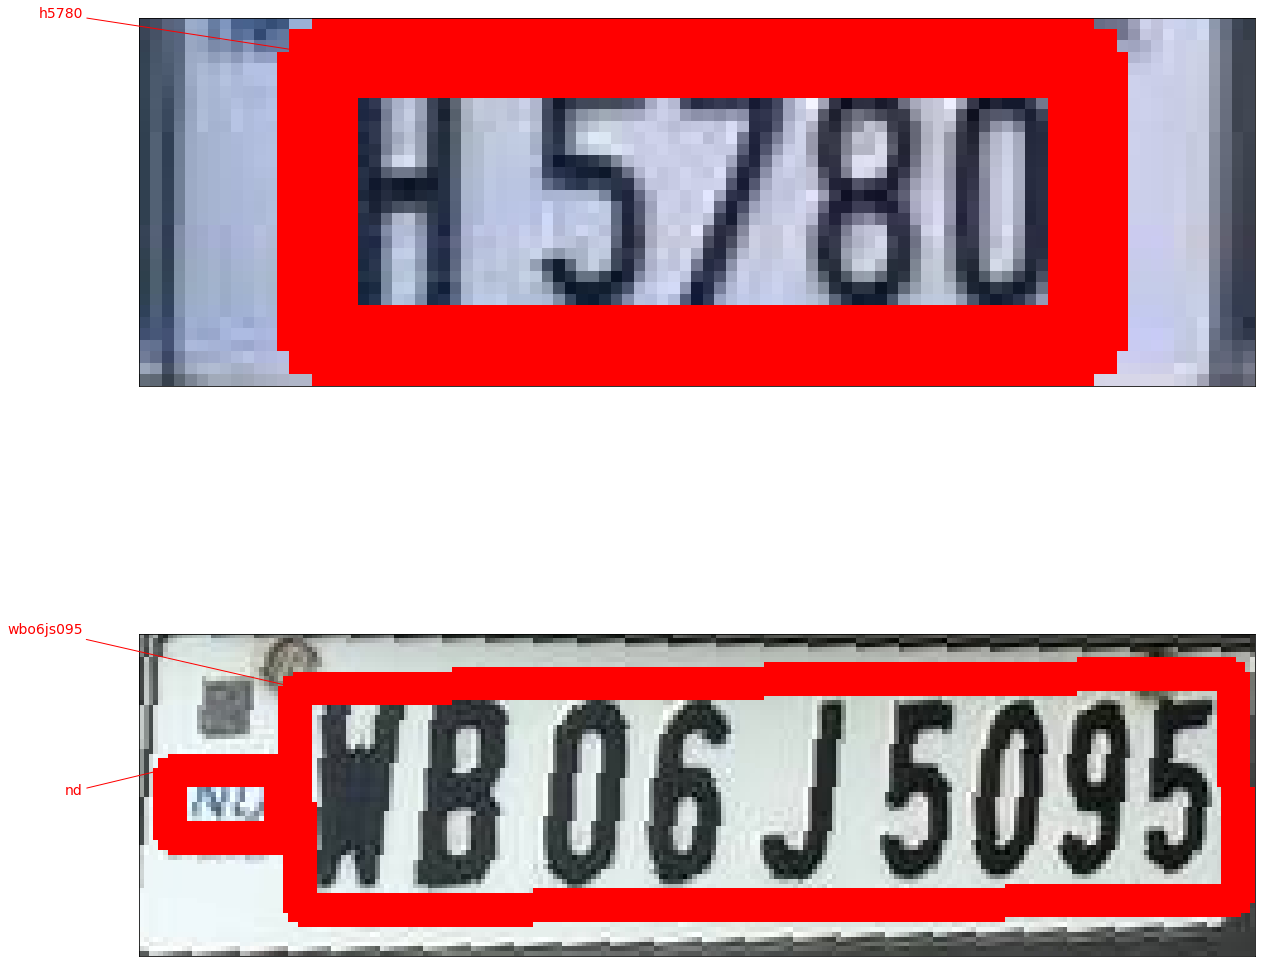

In [ ]:
import matplotlib.pyplot as plt

import keras_ocr

# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

# Get a set of three example images
images = [
    keras_ocr.tools.read(url) for url in [
        'https://i.ibb.co/KzWy7nd/Chevrolet-Beat-520933g-jpg-0000-0166-0238-0097-0032.png',
        'https://i.ibb.co/J5FVFCw/Chevrolet-Beat-519533c-jpg-0006-0402-0386-0232-0067.png'
    ]
]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)